### DATA UNDERSTANDING

In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import load_model,Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical,plot_model


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report

In [4]:
from warnings import filterwarnings
filterwarnings('ignore')

In [5]:
#LOADING THE MNIST DATASET
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [6]:
print('Training Set Size:',X_train.shape,Y_train.shape)
print('Test Set Size:',X_test.shape,Y_test.shape)

Training Set Size: (60000, 28, 28) (60000,)
Test Set Size: (10000, 28, 28) (10000,)


In [7]:
#number of classes
num_labels=len(np.unique(Y_train))
num_labels

10

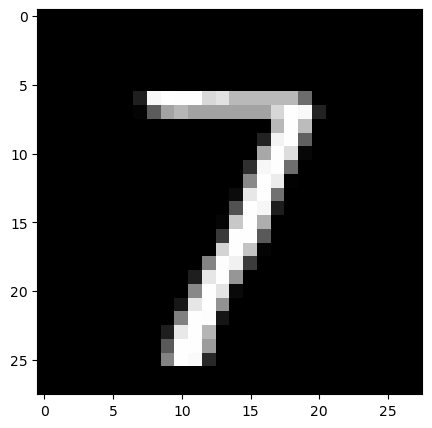

In [8]:
#showing examples from the datas set
#cmap=colour map
plt.figure(figsize=(5,5))
plt.imshow(X_train[560],cmap='gray')

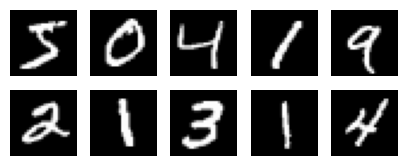

In [9]:

plt.figure(figsize=(5,5))
for i in range(0,10):
    ax=plt.subplot(5,5,i+1)
    plt.imshow(X_train[i],cmap='gray')
    plt.axis('off')

In [10]:
def visualize_img(data,num=10):
    plt.figure(figsize=(5,5))
    for i in range(0,10):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(X_train[i],cmap='gray')
        plt.axis('off')


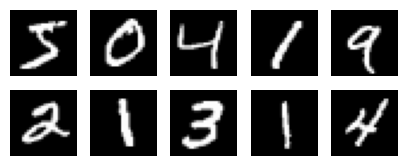

In [11]:
visualize_img(X_train,25)
             

In [12]:
def pixel_visualize(img):
    fig=plt.figure(figsize=(12,12))
    ax=fig.add_subplot(111)
    ax.imshow(img,cmap='gray')
    width,height=img.shape
    
    threshold=img.max()/2.5
    
    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)),xy=(y,x),
                        color='white'if img[x][y]<threshold else'black')

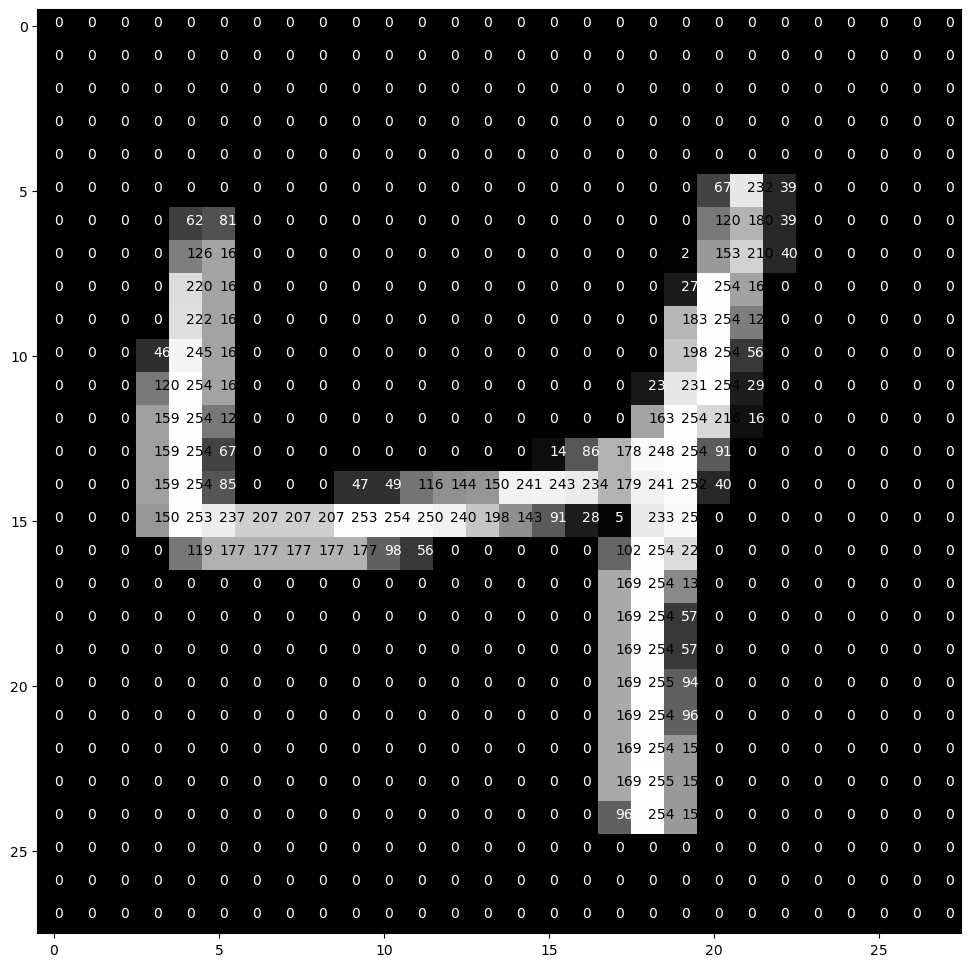

In [13]:
pixel_visualize(X_train[2])

# DATA PREPARATION

## ENCODING FOR DEPENDENT VARIABLE

In [14]:
#before encoding
Y_train[0:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [15]:
Y_train=to_categorical(Y_train)
Y_test=to_categorical(Y_test)

In [16]:
#how classes are expressed after encoding (one-hot encoding)
Y_train[0:5]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

## RESHAPING

In [17]:
image_size=X_train.shape[1]
image_size

28

In [18]:
print(f'X_tarin size:{X_train.shape}\n\nX_test size:{X_test.shape}')

X_tarin size:(60000, 28, 28)

X_test size:(10000, 28, 28)


In [19]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)


In [20]:
print(f'X_train size:{X_train.shape}\n\nX_test size:{X_test.shape}')

X_train size:(60000, 28, 28, 1)

X_test size:(10000, 28, 28, 1)


In [21]:
X_train=X_train.astype('float32')/255
X_test=X_test.astype('float32')/255

In [22]:
X_train[0]

array([[[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ]],

       [[0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        [0.        ],
        

# MODELING

In [23]:
model=tf.keras.Sequential([
    Flatten(input_shape=(28,28,1)),
    Dense(units=128,activation='relu',name='layer1'),
    Dense(units=num_labels,activation='softmax',name='output_layer')])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=[tf.keras.metrics.Precision(),tf.keras.metrics.Recall(),'accuracy'])

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 128)               100480    
                                                                 
 output_layer (Dense)        (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.fit(X_train, Y_train, epochs = 8, batch_size =128, validation_data=(X_test, Y_test))


Epoch 1/8
469/469 [==============================] - 5s 7ms/step - loss: 0.3576 - precision: 0.9474 - recall: 0.8502 - accuracy: 0.9016 - val_loss: 0.1974 - val_precision: 0.9553 - val_recall: 0.9299 - val_accuracy: 0.9427
Epoch 2/8
469/469 [==============================] - 3s 6ms/step - loss: 0.1674 - precision: 0.9634 - recall: 0.9428 - accuracy: 0.9522 - val_loss: 0.1434 - val_precision: 0.9663 - val_recall: 0.9510 - val_accuracy: 0.9578
Epoch 3/8
469/469 [==============================] - 3s 6ms/step - loss: 0.1198 - precision: 0.9729 - recall: 0.9582 - accuracy: 0.9652 - val_loss: 0.1151 - val_precision: 0.9712 - val_recall: 0.9593 - val_accuracy: 0.9646
Epoch 4/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0930 - precision: 0.9780 - recall: 0.9684 - accuracy: 0.9734 - val_loss: 0.0987 - val_precision: 0.9761 - val_recall: 0.9651 - val_accuracy: 0.9707
Epoch 5/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0747 - precision: 0.9824 - recall

# MODEL EVALUATION

In [26]:
history=model.fit(X_train, Y_train, epochs = 8, batch_size =128, validation_data=(X_test, Y_test))


Epoch 1/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0368 - precision: 0.9915 - recall: 0.9881 - accuracy: 0.9898 - val_loss: 0.0713 - val_precision: 0.9806 - val_recall: 0.9765 - val_accuracy: 0.9785
Epoch 2/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0311 - precision: 0.9928 - recall: 0.9901 - accuracy: 0.9914 - val_loss: 0.0748 - val_precision: 0.9794 - val_recall: 0.9758 - val_accuracy: 0.9774
Epoch 3/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0269 - precision: 0.9941 - recall: 0.9915 - accuracy: 0.9927 - val_loss: 0.0728 - val_precision: 0.9813 - val_recall: 0.9767 - val_accuracy: 0.9782
Epoch 4/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0217 - precision: 0.9955 - recall: 0.9936 - accuracy: 0.9946 - val_loss: 0.0669 - val_precision: 0.9812 - val_recall: 0.9786 - val_accuracy: 0.9797
Epoch 5/8
469/469 [==============================] - 3s 6ms/step - loss: 0.0190 - precision: 0.9962 - recall

Text(0.5, 1.0, 'Training and Test loss Graph')

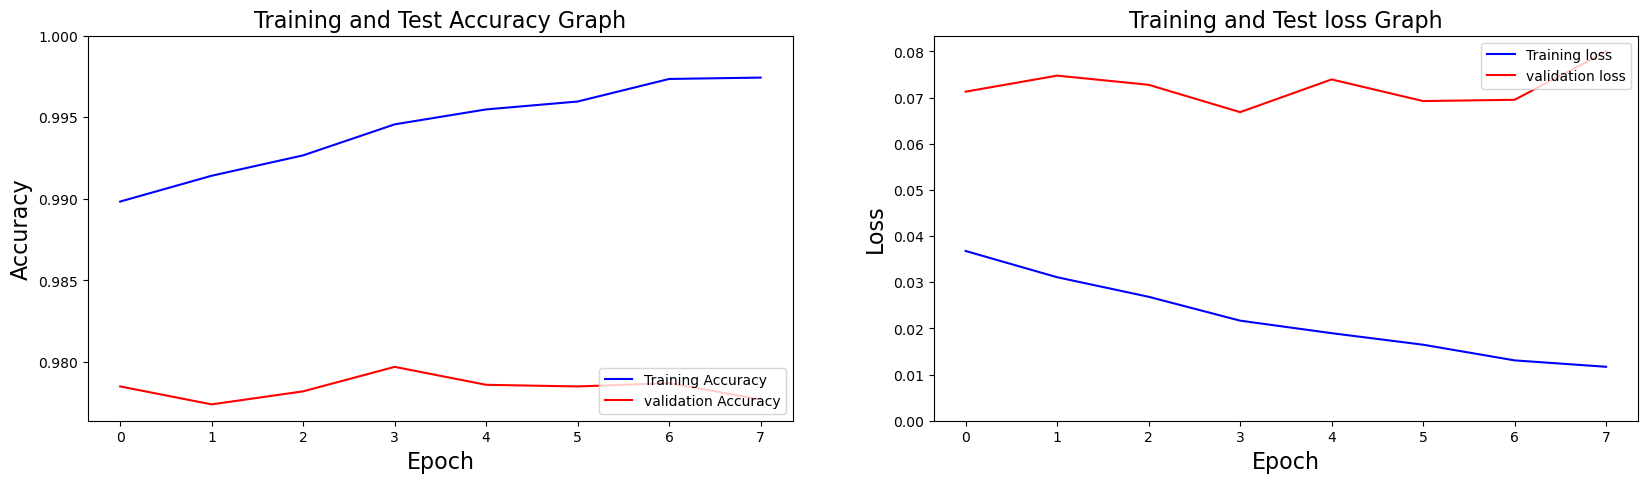

In [27]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(history.history["accuracy"], color = "b",
        label = "Training Accuracy")
plt.plot(history.history["val_accuracy"], color = "r",
        label="validation Accuracy")
plt.legend(loc= "lower right")
plt.xlabel("Epoch", fontsize = 16)
plt.ylabel("Accuracy", fontsize = 16)
plt.ylim([min(plt.ylim()),1])
plt.title("Training and Test Accuracy Graph", fontsize = 16)
plt.subplot(1,2,2)
plt.plot(history.history["loss"], color = "b", label = "Training loss")
plt.plot(history.history["val_loss"], color = "r",
        label = "validation loss")
plt.legend(loc ="upper right")
plt.xlabel("Epoch", fontsize =16)
plt.ylabel("Loss", fontsize = 16)
plt.ylim([0, max(plt.ylim())])
plt.title("Training and Test loss Graph", fontsize = 16)


##loss

In [28]:
loss, precision, recall, acc= model.evaluate(X_test, Y_test, verbose=False)
print(f"Test accuracy: {round(acc*100, 2)}")
print(f"Test loss: {round(loss*100, 2)}")
print(f"Test precision: {round(precision*100, 2)}")
print(f"Test recall: {round(recall*100, 2)}")

      


Test accuracy: 97.77
Test loss: 8.0
Test precision: 97.94
Test recall: 97.65


In [29]:
Y_pred=model.predict(X_test)
Y_pred_classes=np.argmax(Y_pred,axis=1)

313/313 [==============================] - 1s 2ms/step


In [30]:
if len(Y_test.shape)>1 and Y_test.shape[1]!=1:
    Y_test=np.argmax(Y_test,axis=1)

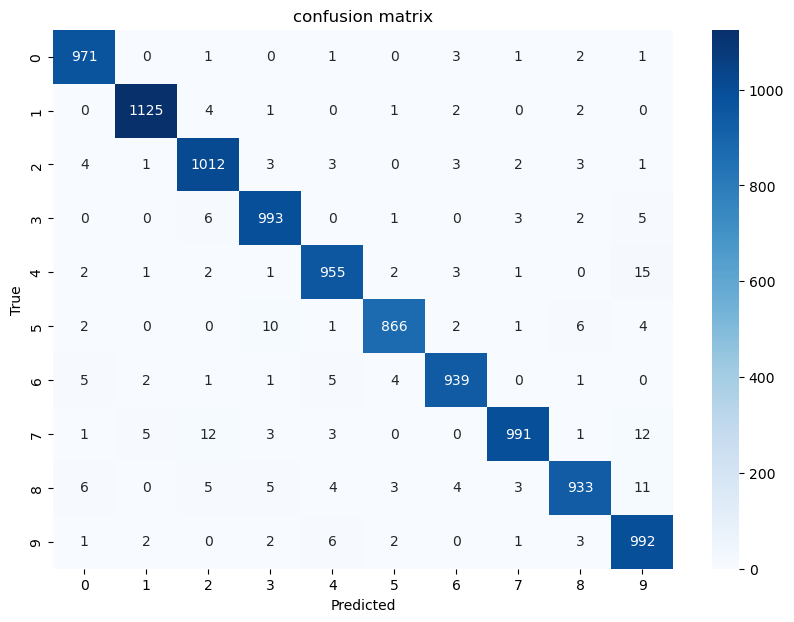

In [31]:
#confusion matrix
cm=confusion_matrix(Y_test,Y_pred_classes)
plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('confusion matrix')
plt.show()

In [32]:
model.save('mnist_model.h5')

In [33]:
import random
random=random.randint(0,X_test.shape[0])

In [34]:
random

3439

In [35]:
test_image=X_test[random]

In [36]:
Y_test[random]

0

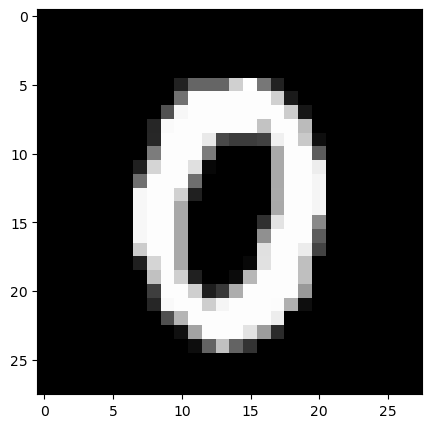

In [37]:
plt.figure(figsize=(5,5))
plt.imshow(test_image.reshape(28,28),cmap='gray')

In [38]:
test_data=X_test[random].reshape(1,28,28,1)

In [43]:
probability=model.predict(test_data)

1/1 [==============================] - 0s 189ms/step


In [44]:
predict_classes=np.argmax(probability)

In [45]:
print(f"predicted class: {predict_classes}\nProbability value of predicted class:{np.max(probability,axis=-1)[0]}\nprobability values of other classes:{probability}")

predicted class: 0
Probability value of predicted class:0.9999203681945801
probability values of other classes:[[9.9992037e-01 1.6174907e-14 2.3396605e-09 4.0356059e-13 2.3695763e-12
  2.8394673e-10 2.1392417e-10 1.0647861e-06 1.3187828e-11 7.8515637e-05]]
